# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## VERNINAS Hippolyte

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
from scipy.stats import norm, chi2, gaussian_kde

In [107]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [108]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [109]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [110]:
regions = list(df.region.unique())

In [111]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [112]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [113]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [114]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

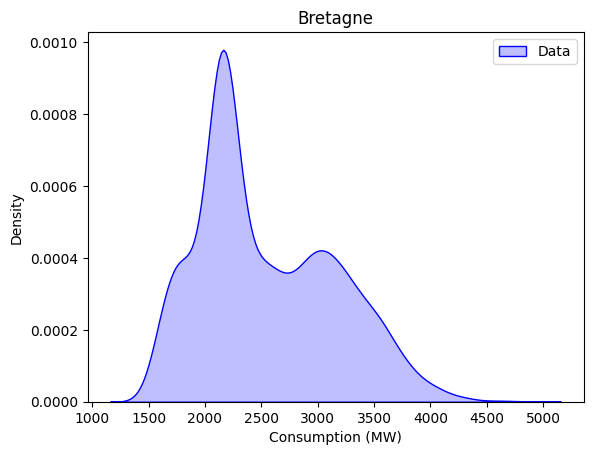

In [115]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [116]:
df_bretagne = df[df.region == "Bretagne"]

moyenne = df_region.consumption.sum()/df_bretagne.consumption.count()
print(f"moyenne: {moyenne}")
variance = sum([(x-moyenne)**2 for x in df_bretagne.consumption])/(df_bretagne.consumption.count()-1)
print(f"variance: {variance}")


moyenne: 2546.536155666579
variance: 365956.01414481626


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [117]:
# Nombre d'observations
nombre_observations = df_bretagne.consumption.count()

# Génération de données avec une distribution normale (gaussienne)
donnees_simulees = norm.rvs(loc=moyenne, scale=np.sqrt(variance), size=nombre_observations)


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

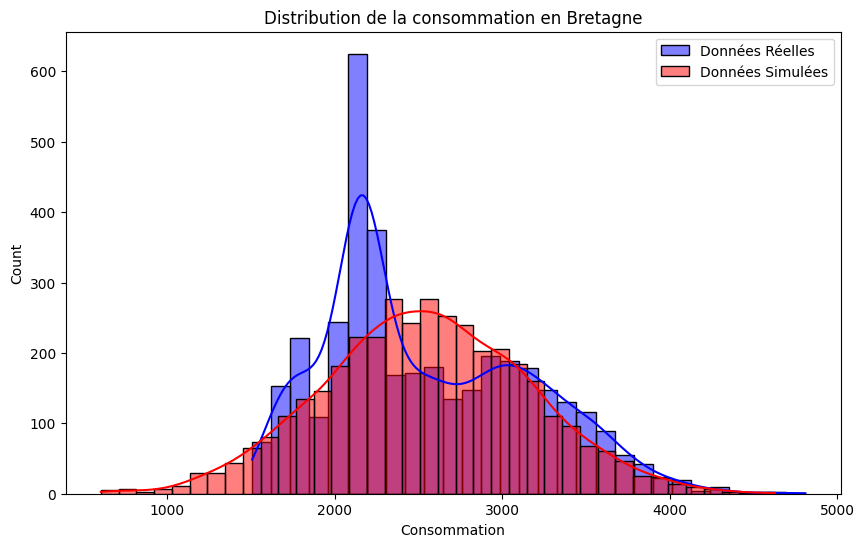

In [118]:
# Affichage des nouvelles données générées
plt.figure(figsize=(10, 6))

# Histogramme des données réelles
sns.histplot(df_bretagne.consumption, kde=True, color='blue', label='Données Réelles')

# Histogramme des données générées
sns.histplot(donnees_simulees, kde=True, color='red', label='Données Simulées')

plt.title(f'Distribution de la consommation en {region}')
plt.xlabel('Consommation')
plt.legend()
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

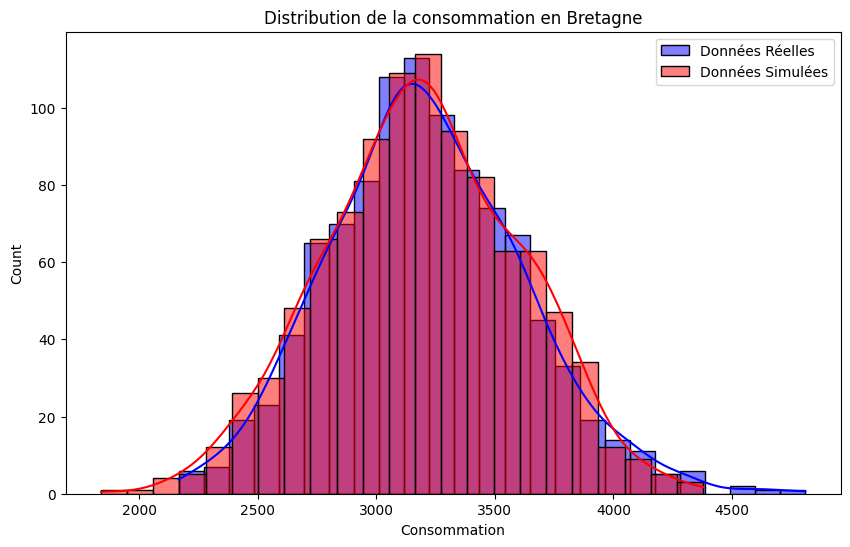

In [119]:
# Filtrer les jours d'hiver
df_bretagne_hiver = pd.DataFrame()
for year in range(2012, int(str(np.datetime64("now"))[:4])+1):
    df_bretagne_hiver = pd.concat([df_bretagne_hiver, df_region[((df_region["date"] >= f"{year}-12-22")) & (df_region["date"] <= f"{year+1}-03-22")]])

# Calcul de la moyenne et de la variance
moyenne_hiver = df_bretagne_hiver.consumption.sum() / df_bretagne_hiver.consumption.count()
variance_hiver = sum((x - moyenne_hiver) ** 2 for x in df_bretagne_hiver.consumption) / (df_bretagne_hiver.consumption.count() - 1)

# Génération de nouvelles données avec un modèle gaussien pour les jours d'hiver
donnees_simulees_hiver = norm.rvs(loc=moyenne_hiver, scale=np.sqrt(variance_hiver), size=df_bretagne_hiver.consumption.count())

# Affichage des nouvelles données générées
plt.figure(figsize=(10, 6))

# Histogramme des données réelles
sns.histplot(df_bretagne_hiver.consumption, kde=True, color='blue', label='Données Réelles')

# Histogramme des données générées
sns.histplot(donnees_simulees_hiver, kde=True, color='red', label='Données Simulées')

plt.title(f'Distribution de la consommation en {region}')
plt.xlabel('Consommation')
plt.legend()
plt.show()


6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

L'hypothèse gaussienne est plus appropriée lorsque les données suivent une distribution normale, c'est-à-dire une distribution gaussienne. En d'autres termes, l'hypothèse gaussienne est adaptée lorsque la distribution des données peut être caractérisée par une courbe en forme de cloche symétrique.

Dans le contexte de ton code, l'hypothèse gaussienne serait plus appropriée lorsque la consommation d'énergie suit une distribution normale dans la région spécifique (comme "Bretagne") pour laquelle tu as calculé la moyenne et la variance. L'estimation de la densité par noyau (KDE) est également plus fiable lorsque les données suivent une distribution continue.

Il est important de noter que dans de nombreux cas réels, les données peuvent ne pas suivre parfaitement une distribution normale. Dans de tels cas, il peut être nécessaire d'utiliser d'autres modèles statistiques ou méthodes d'analyse des données qui sont plus adaptés à la nature spécifique des données observées.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

$$ 
d(f,g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx \leq \frac 1 2 \int |f(x)| \mathrm dx + \frac 1 2 \int |g(x)| \mathrm dx = \frac 1 2 + \frac 1 2 = 1
$$

Par positivité de l'intégrale, $d(f,g) \geq 0$.

D'où $d(f,g) \in [0,1]$.

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [120]:
# Calcul de la KDE pour les données réelles de la Bretagne
kde_reelles_bretagne = gaussian_kde(df_bretagne.consumption)

# Calcul de la densité simulée
densite_simule = norm(loc=moyenne, scale=np.sqrt(variance)).pdf

# Calcul de la dissimilarité
x = np.linspace(0,2*df_region.consumption.max(),1000)
dissimilarite = np.trapz(np.abs(kde_reelles_bretagne(x)-densite_simule(x)),x=x)
print(f"dissimilarité: {dissimilarite}")

dissimilarité: 0.35824879201232074


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [121]:
# Calcul de la KDE pour les données réelles de la Bretagne en hiver
kde_reelles_bretagne_hiver = gaussian_kde(df_bretagne_hiver.consumption)

# Calcul de la densité simulée pour l'hiver
densite_simule_hiver = norm(loc=moyenne_hiver, scale=np.sqrt(variance_hiver)).pdf

# Calcul de la dissimilarité
x = np.linspace(0,2*df_bretagne_hiver.consumption.max(),1000)
dissimilarite_hiver = np.trapz(np.abs(kde_reelles_bretagne_hiver(x)-densite_simule_hiver(x)),x=x)
print(f"dissimilarité: {dissimilarite_hiver}")


dissimilarité: 0.06275530561855515


On observe que la dissimilarité est bien plus faible en hiver, donc que le modèle gaussien est plus adapté en hiver.

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [122]:
# Liste pour stocker les résultats
resultats = []

# Boucle sur toutes les régions
for region in regions:
    # Sélection des données pour la région
    df_region = df[df.region == region]
    
    # Calcul de la moyenne et de la variance
    moyenne_region = df_region.consumption.sum() / df_region.consumption.count()
    variance_region = sum((x - moyenne_region) ** 2 for x in df_region.consumption) / (df_region.consumption.count() - 1)
    
    # Calcul de la KDE pour les données réelles
    kde_reelles = gaussian_kde(df_region.consumption)

    # Calcul de la densité simulée
    densite_simule = norm(loc=moyenne_region, scale=np.sqrt(variance_region)).pdf

    # Calcul de la dissimilarité
    x = np.linspace(0,2*df_region.consumption.max(),1000)
    dissimilarite = np.trapz(np.abs(kde_reelles(x)-densite_simule(x)),x=x)

    # Filtrer les jours d'hiver
    df_region_hiver = pd.DataFrame()
    for year in range(2012, int(str(np.datetime64("now"))[:4])+1):
        df_region_hiver = pd.concat([df_region_hiver, df_region[((df_region["date"] >= f"{year}-12-22")) & (df_region["date"] <= f"{year+1}-03-22")]])

    # Calcul de la moyenne et de la variance
    moyenne_region_hiver = df_region_hiver.consumption.sum() / df_region_hiver.consumption.count()
    variance_region_hiver = sum((x - moyenne_region_hiver) ** 2 for x in df_region_hiver.consumption) / (df_region_hiver.consumption.count() - 1)

    # Calcul de la KDE pour les données réelles de la Bretagne en hiver
    kde_reelles_hiver = gaussian_kde(df_region_hiver.consumption)

    # Calcul de la densité simulée pour l'hiver
    densite_simule_hiver = norm(loc=moyenne_region_hiver, scale=np.sqrt(variance_region_hiver)).pdf

    # Calcul de la dissimilarité
    x = np.linspace(0,2*df_region_hiver.consumption.max(),1000)
    dissimilarite_hiver = np.trapz(np.abs(kde_reelles_hiver(x)-densite_simule_hiver(x)),x=x)
    
    # Ajout des résultats à la liste
    resultats.append({'Région': region, 'Dissimilarité': dissimilarite, 'Dissimilarité Hiver': dissimilarite_hiver})

# Création du DataFrame à partir de la liste
resultats_df = pd.DataFrame(resultats)

# Affichage du DataFrame des résultats
print(resultats_df)


                        Région  Dissimilarité  Dissimilarité Hiver
0         Auvergne-Rhône-Alpes       0.336957             0.072982
1      Bourgogne-Franche-Comté       0.249101             0.072919
2                     Bretagne       0.358249             0.062755
3          Centre-Val de Loire       0.388121             0.085501
4                    Grand Est       0.230080             0.078664
5              Hauts-de-France       0.262916             0.055988
6                    Normandie       0.348584             0.086659
7           Nouvelle-Aquitaine       0.435217             0.107003
8                    Occitanie       0.445071             0.126727
9             Pays de la Loire       0.338277             0.079030
10  Provence-Alpes-Côte d'Azur       0.458718             0.067990
11               Île-de-France       0.348492             0.105038


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

Ce sont les Hauts-de-France qui ont le meilleur *fit* avec le modèle gaussien en hiver.

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

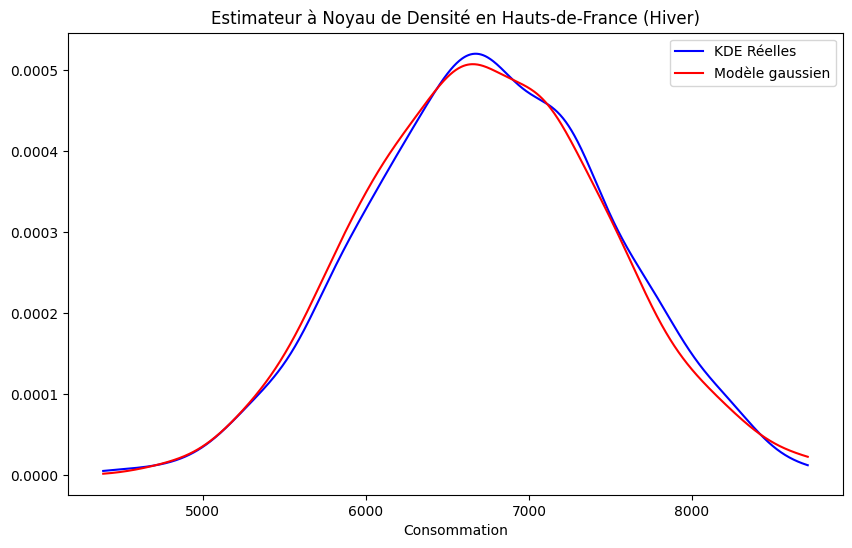

In [123]:
# Sélection de la région et de la saison
region = "Hauts-de-France"
# Sélection des données pour la région
df_region = df[df.region == region]

# Filtrer les jours d'hiver
df_region_hiver = pd.DataFrame()
for year in range(2012, int(str(np.datetime64("now"))[:4])+1):
    df_region_hiver = pd.concat([df_region_hiver, df_region[((df_region["date"] >= f"{year}-12-22")) & (df_region["date"] <= f"{year+1}-03-22")]])

# Calcul de la moyenne et de la variance
moyenne_region_hiver = df_region_hiver.consumption.sum() / df_region_hiver.consumption.count()
variance_region_hiver = sum((x - moyenne_region_hiver) ** 2 for x in df_region_hiver.consumption) / (df_region_hiver.consumption.count() - 1)

# Calcul de la KDE pour les données réelles de la Bretagne en hiver
kde_reelles_hiver = gaussian_kde(df_region_hiver.consumption)

# Calcul de la densité simulée pour l'hiver
densite_simule_hiver = gaussian_kde(norm.rvs(loc=moyenne_region_hiver, scale=np.sqrt(variance_region_hiver), size=df_region_hiver.consumption.count()))

# Calcul de la dissimilarité
x = np.linspace(df_region_hiver.consumption.min(),df_region_hiver.consumption.max(),1000)

# Tracé de la KDE des données réelles et générées sur le même graphique
plt.figure(figsize=(10, 6))

# KDE des données réelles
plt.plot(x, kde_reelles_hiver(x), label='KDE Réelles', color='blue')

# KDE des données générées
plt.plot(x, densite_simule_hiver(x), label='Modèle gaussien', color='red')

plt.title(f'Estimateur à Noyau de Densité en {region} (Hiver)')
plt.xlabel('Consommation')
plt.legend()
plt.show()


## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$ MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$ MW et l'écart-type $\sigma_0=500$ MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

La loi a posteriori pour la moyenne \(\mu\) dans le contexte de la statistique bayésienne peut être exprimée en utilisant la loi a priori et la vraisemblance des données. En supposant une loi normale pour la vraisemblance, la loi a posteriori pour \(\mu\) est également une loi normale.

La densité a priori pour \(\mu\) est donnée par une loi normale avec une moyenne \(\mu_0\) et un écart-type \(\sigma_0\), et la vraisemblance des données, en supposant une loi normale avec écart-type connu \(\sigma\), est donnée par une distribution normale avec une moyenne \(\mu\) et l'écart-type \(\sigma\).

La loi a posteriori pour \(\mu\) est alors proportionnelle au produit de la densité a priori et de la vraisemblance des données. Utilisons les notations suivantes :

- $n$ : nombre d'observations
- $\mu$ : moyenne à estimer
- $\mu_{0}$ : moyenne a priori
- $\sigma_{0}$ : écart-type a priori
- $\sigma$ : écart-type connu
- $x_1, x_2, \ldots, x_n$ : observations

La densité a posteriori pour \(\mu\) est donnée par la formule de Bayes :

\[ p(\mu | x_1, x_2, \ldots, x_n) \propto p(\mu) \cdot p(x_1, x_2, \ldots, x_n | \mu) \]

Sachant que \(p(\mu) \propto \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)\) (loi normale) et \(p(x_1, x_2, \ldots, x_n | \mu) \propto \exp\left(-\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{2\sigma^2}\right)\) (loi normale avec écart-type connu), on peut exprimer la loi a posteriori proportionnelle à une loi normale avec une nouvelle moyenne et un nouvel écart-type.

La loi a posteriori pour $\mu$ est donc une loi normale avec une moyenne et un écart-type donnés par les formules suivantes :

$$ 
\mu_ {\text post} = \frac {\frac \mu {\sigma_{0}^2} + \frac {\sum x} {\sigma^2}} {\frac 1 {\sigma_{0}^2} + \frac n {\sigma^2}} 
$$

Ces formules représentent la moyenne et l'écart-type de la loi a posteriori pour \(\mu\).

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [129]:
# Paramètres initiaux
mu_0 = 3500  # Moyenne a priori
sigma_0 = 500  # Écart-type a priori
sigma = 400  # Écart-type connu

# Création d'une liste pour stocker les résultats
resultats_bayesiens = []

df_bretagne_hiver['date'] = pd.to_datetime(df_bretagne_hiver['date'], format='%Y-%m-%d')

# Boucle sur chaque année de 2013 à 2023
for annee in range(2013, 2024):
    # Sélection des données pour l'année spécifique
    df_annee = df_bretagne_hiver[df_bretagne_hiver['date'].dt.year == annee]
    
    # Nombre d'observations pour cette année
    n = df_annee.shape[0]
    
    # Calcul des paramètres de la loi a posteriori
    mu_post = ((mu_0 / sigma_0**2) + (df_annee['consumption'].sum() / sigma**2)) / ((1 / sigma_0**2) + (n / sigma**2))
    sigma_post = np.sqrt(1 / ((1 / sigma_0**2) + (n / sigma**2)))
    
    # Ajout des résultats à la liste
    resultats_bayesiens.append({'Année': annee, 'Mu_post': mu_post, 'sigma_post': sigma_post})

# Création d'un DataFrame à partir de la liste
resultats_bayesiens_df = pd.DataFrame(resultats_bayesiens)

# Affichage du DataFrame des résultats
print(resultats_bayesiens_df)


    Année      Mu_post   sigma_post
0    2013  3341.652117  1745.962462
1    2014  3112.811000  1745.962462
2    2015  3162.341772  1745.962462
3    2016  3207.135147  1727.115717
4    2017  3248.232213  1745.962462
5    2018  3318.321694  1745.962462
6    2019  3191.390223  1745.962462
7    2020  3139.011226  1727.115717
8    2021  3339.295068  1745.962462
9    2022  3158.402444  1745.962462
10   2023  3112.800098  1959.823616


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

44.26989514189718


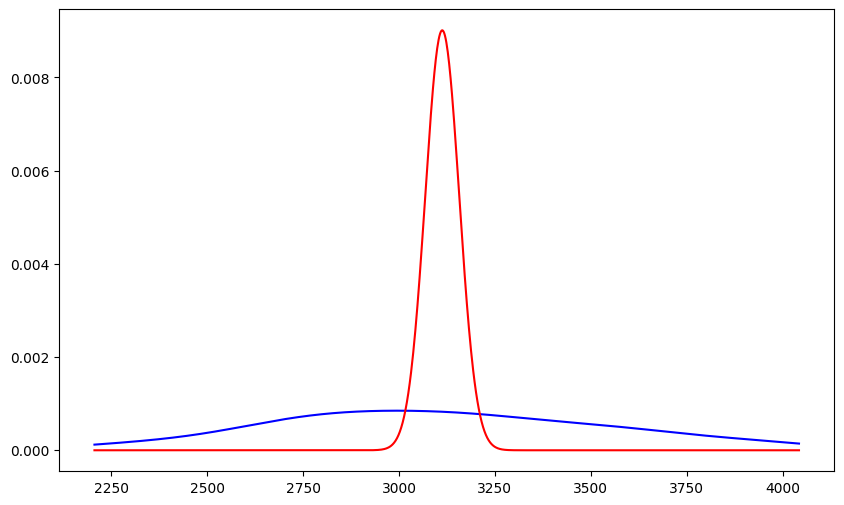

In [140]:
df_annee = df_bretagne_hiver[df_bretagne_hiver['date'].dt.year == 2023]

n = df_annee.consumption.count()
mu_post = ((mu_0 / sigma_0**2) + (df_annee['consumption'].sum() / sigma**2)) / ((1 / sigma_0**2) + (n / sigma**2))
sigma_post = np.sqrt(1 / ((1 / sigma_0**2) + (n / sigma**2)))

loi_post = norm(loc=mu_post, scale=sigma_post).pdf

kde_reelles = gaussian_kde(df_annee.consumption)

x = np.linspace(df_annee.consumption.min(),df_annee.consumption.max(),1000)

# Tracé de la KDE des données réelles et générées sur le même graphique
plt.figure(figsize=(10, 6))
plt.plot(x, kde_reelles(x), label='KDE Réelles', color='blue')
plt.plot(x, loi_post(x), label='Loi a posteriori', color='red')
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse :

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :

2. Donnez le résultat de ce test pour $\alpha=1\%$.

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse :

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse :

4. Donnez le résultat de ce test pour $\alpha=1\%$.

## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.